<a href="https://colab.research.google.com/github/apoorvapu/data_science/blob/main/Image_Classification_CNN_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


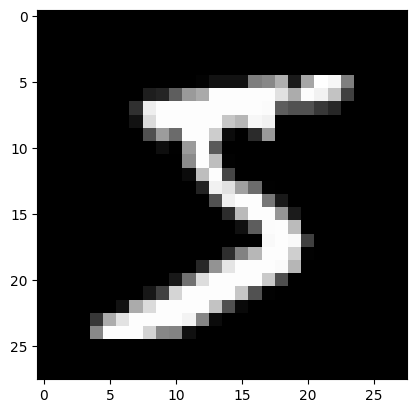

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="gray", interpolation="nearest")

In [10]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
# Reshape data to fit CNN input format
X_train = x_train / 255.0
X_test = x_test / 255.0
#x_train[0]

In [13]:
# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
#y_train

In [14]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.5589 - loss: 1.2723 - val_accuracy: 0.9233 - val_loss: 0.2604
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 45ms/step - accuracy: 0.9255 - loss: 0.2372 - val_accuracy: 0.9509 - val_loss: 0.1662
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9536 - loss: 0.1523 - val_accuracy: 0.9629 - val_loss: 0.1216
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9677 - loss: 0.1051 - val_accuracy: 0.9737 - val_loss: 0.0862
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 40ms/step - accuracy: 0.9745 - loss: 0.0824 - val_accuracy: 0.9684 - val_loss: 0.1024


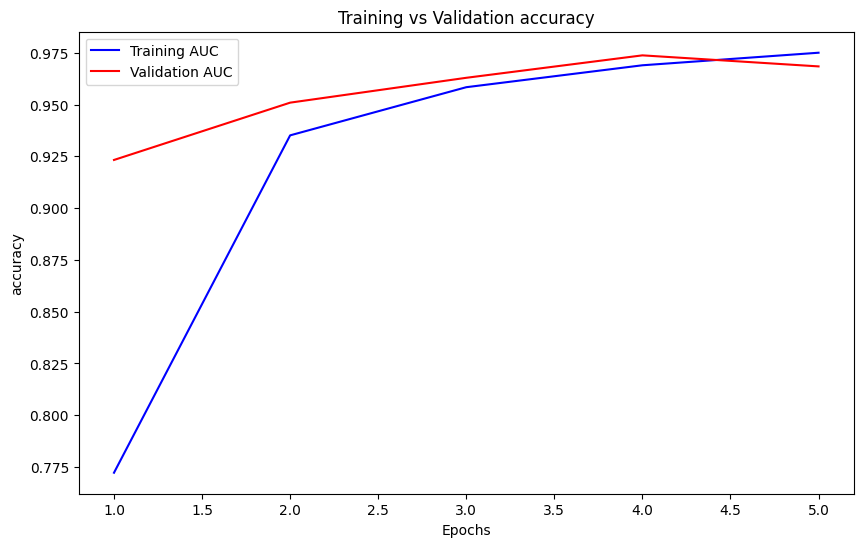

In [16]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

In [ ]:
plt.figure(figsize=(10, 6))
epochs_range = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs_range, history.history['accuracy'], label="Training accuracy", color='blue')
plt.plot(epochs_range, history.history['val_accuracy'], label="Validation accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Training vs Validation accuracy")
plt.legend()
plt.show()

In [24]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class index with the highest probability
y_test_classes = np.argmax(y_test, axis=1)  # Get the class index with the highest probability

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [25]:
accuracy_score=(accuracy_score(y_test_classes, y_pred_classes))
print(f"Test Accuracy: {accuracy_score:.4f}")

Test Accuracy: 0.9696


# vision transformer

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize and reshape images (ViT expects 3D input)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)  # (10000, 28, 28, 1)

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# ViT requires images with 3 channels, so we repeat the single channel
x_train = np.repeat(x_train, 3, axis=-1)  # (60000, 28, 28, 3)
x_test = np.repeat(x_test, 3, axis=-1)  # (10000, 28, 28, 3)

# Resize images to match ViT input size (ViT typically uses 32x32 or higher)
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Vision Transformer parameters
patch_size = 4  # Divide the image into 4x4 patches
num_patches = (32 // patch_size) ** 2  # Number of patches
projection_dim = 64  # Embedding size
num_heads = 4  # Number of attention heads
transformer_units = [128, 64]  # Feedforward layers in transformer
transformer_layers = 2  # Number of transformer blocks
mlp_head_units = [128, 64]  # Feedforward layers after transformer

# Patch Encoding Layer
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.projection = layers.Dense(projection_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = tf.range(start=0, limit=num_patches, delta=1)
        return self.projection(patch) + self.position_embedding(positions)

# Build the Vision Transformer model
def create_vit_classifier():
    inputs = layers.Input(shape=(32, 32, 3))

    # Extract patches
    patches = layers.Conv2D(projection_dim, kernel_size=patch_size, strides=patch_size, padding="valid")(inputs)
    patches = layers.Reshape((num_patches, projection_dim))(patches)

    # Encode patches
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Transformer blocks
    for _ in range(transformer_layers):
        x1 = layers.LayerNormalization()(encoded_patches)
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization()(x2)
        x3 = keras.Sequential([layers.Dense(units, activation=tf.nn.gelu) for units in transformer_units])(x3)
        encoded_patches = layers.Add()([x3, x2])

    # Classification head
    representation = layers.LayerNormalization()(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = keras.Sequential([layers.Dense(units, activation=tf.nn.gelu) for units in mlp_head_units])(representation)
    outputs = layers.Dense(10, activation="softmax")(representation)

    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Compile and train the model
vit_model = create_vit_classifier()
vit_model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Train the model
history = vit_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# Evaluate the model
test_loss, test_acc = vit_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
